In [3]:
import pandas as pd

url_df = pd.read_csv("Malicious URLs.csv")
url_df.tail(50)

,URLs,Class
333337,picclick.com/?q=Tiny+Tim,good
333338,en.wikipedia.org/wiki/James_Tate,good
333339,spoke.com/info/p6RmTlu/WayneKinde,good
333340,liverpoolecho.co.uk/topics/nels-gym/,good
333341,absoluteastronomy.com/topics/Polish_army_order...,good
333342,nj.com/hudson/voices/index.ssf/2011/09/republi...,good
333343,wowjobs.ca/job/Airport+security+guard-garda-ke...,good
333344,canadianheadstones.com/qc/cemetery_pf.php?cemI...,good
333345,forums.canadian-tv.com/showthread.php?29761-Mu...,good
333346,highwayexplorer.com/EndsPage.php?id=1912&secti...,good


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline
import tensorflow as tf
loss = tf.keras.losses.SparseCategoricalCrossentropy()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report
import seaborn  as sns

from sklearn.feature_extraction.text import TfidfVectorizer

print("Imported all necessary packages.")


Imported all necessary packages.


In [5]:
test_percentage = .2
train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=42)

labels = train_df["Class"]
test_labels = test_df["Class"]

print("Seperated training and test data.")

Seperated training and test data.


Training Samples:  266709
Testing Samples: 66678


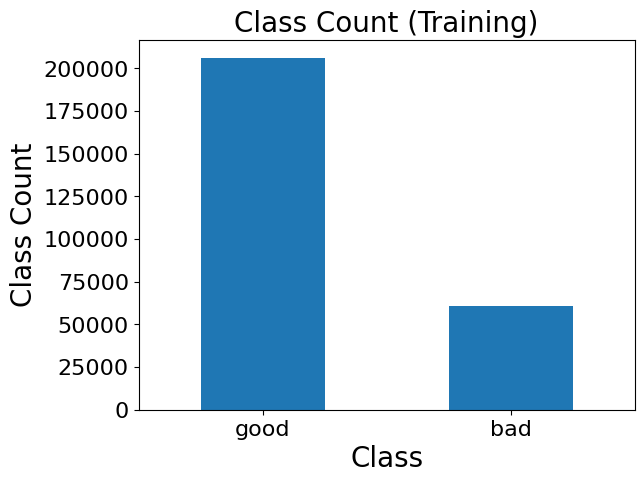

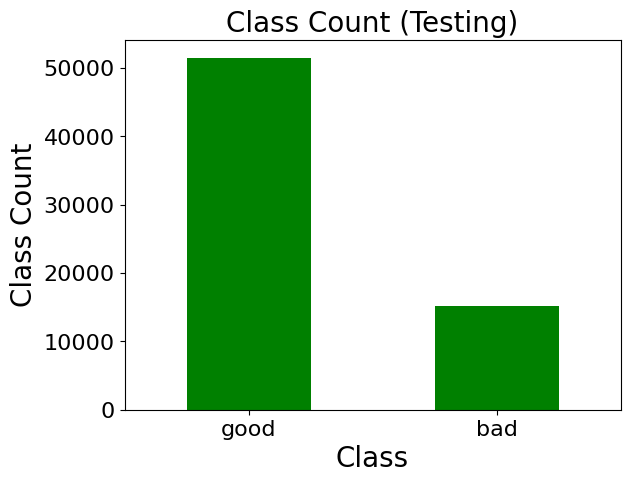

In [6]:
print("Training Samples: ", len(train_df))
print("Testing Samples:", len(test_df))

count_train_classes = pd.Series(train_df["Class"]).value_counts()
count_train_classes.plot(kind="bar", fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation="horizontal")
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.Series(test_df["Class"]).value_counts()
count_test_classes.plot(kind="bar", fontsize=16, colormap="ocean")
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation="horizontal")
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

In [7]:
def tokenizer(url):
    """Separates feature words from the raw data.
    Keyword arguments:
    url ----  The fill URL
    
    :Returns -- The tokenized words; returned as a list
    """

    tokens = re.split("[/-]", url)

    for i in tokens:
        if i.find(".") >= 0:
            dot_split = i.split(".")

            if "com" in dot_split:
                dot_split.remove("com")
            if "www" in dot_split:
                dot_split.remove("www")

            tokens += dot_split
    return tokens
print("Done tokenizer")

Done tokenizer


In [8]:
print("Full URL: ", url_df["URLs"][5])

tokenized_url = tokenizer(url_df["URLs"][5])
print("Tokenized URL: ", tokenized_url)

Full URL:  aquatixbottle.com/vkZuz9
Tokenized URL:  ['aquatixbottle.com', 'vkZuz9', 'aquatixbottle']


In [9]:
print("Training Count vectorizer.")
cVec = CountVectorizer(tokenizer=tokenizer)
count_x= cVec.fit_transform(train_df["URLs"])

print("Training TF-IDF vectorizer.")
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_x = tVec.fit_transform(train_df['URLs'])

print("Vectorizing Completed.")

Training Count vectorizer.


c:\Users\lmmwe\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training TF-IDF vectorizer.
Vectorizing Completed.


In [10]:
print("Test Count Vectorizer.")
test_count_x = cVec.transform(test_df["URLs"])

print("Test TFIDF Vectorizer.")
test_tfidf_x = tVec.transform(test_df["URLs"])

print("Vectorizinf Completed.")

Test Count Vectorizer.
Test TFIDF Vectorizer.
Vectorizinf Completed.


In [11]:
def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model

  :Returns -- N/A
  """

  cmatrix = cmatrix.T

  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix,
              annot=True,
              fmt="d",
              linewidths=.5,
              square=True,
              cmap="Blues",
              annot_kws={"size ": 16},
              xticklabels=["bad", "good"],
              yticklabels=["bad", "good"])
  
  plt.xticks(rotation="horizontal", fontsize=16)
  plt.yticks(rotation="horizontal", fontsize=16)
  plt.xlabel("Actual Label", size=20);
  plt.ylabel("Predicted Label", size=20);

  title= "Accuracy Score: {0:.4f}".format(score)
  plt.title(title, size = 20);

  print(creport)
  plt.show()

print("Report Generator.")

Report Generator.


In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np

le = LabelEncoder()
labels = le.fit_transform(train_df['Class'])
test_labels =le.fit_transform(test_df['Class'])

ytrain = to_categorical(labels)
ytest = to_categorical(test_labels)


xtrain = np.array(tfidf_x)
xtest = np.array(test_tfidf_x)

In [14]:
 from sklearn.ensemble import RandomForestClassifier 

mnb_tfidf = RandomForestClassifier()
mnb_tfidf.fit(tfidf_x, labels)

RandomForestClassifier()

In [ ]:
score = mnb_tfidf.score(test_tfidf_x, test_labels)

print("Accuracy: ", score)#doof is great.